In [ ]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install adversarial-robustness-toolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.4 MB/s eta 0:00:00


SO now , let's Download the dataset and build the model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)


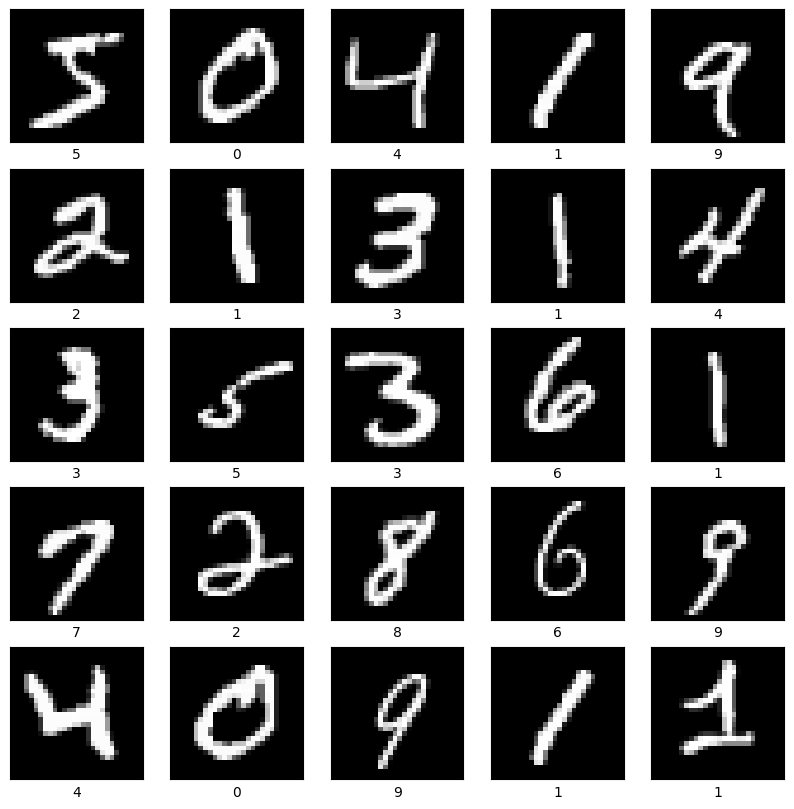

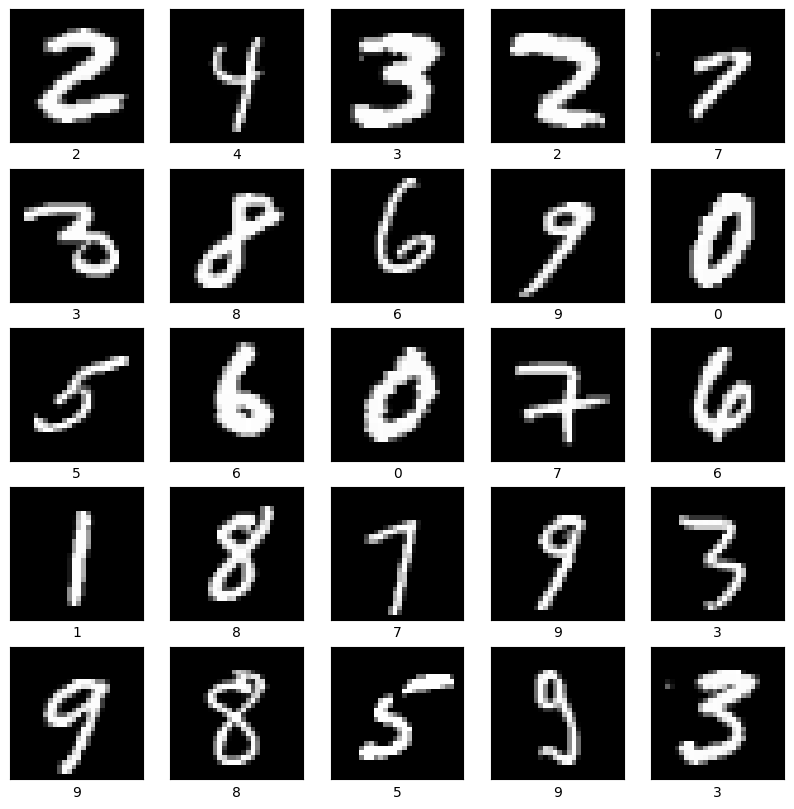

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # by default 85% training and  15% for testing 60000 for training and 10000 for teting
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
plt.figure(figsize=(10, 10))

#print first 25 images from training data
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],'gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#print second 25 from training data
plt.figure(figsize=(10, 10))
j=0
for i in range(25,50,1):
    j=j+1
    plt.subplot(5, 5, j)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],'gray')
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [4]:
FULLY_CONNECT_NUM = 128
batch_size=128

NUM_CLASSES = len(class_names)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_data=(test_images, test_labels),
                    verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss", "val_loss"]].plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 247s 522ms/step - accuracy: 0.8528 - loss: 0.4673 - val_accuracy: 0.9817 - val_loss: 0.0556
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 248s 493ms/step - accuracy: 0.9842 - loss: 0.0497 - val_accuracy: 0.9873 - val_loss: 0.0373
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 245s 522ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.9912 - val_loss: 0.0265
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 252s 500ms/step - accuracy: 0.9934 - loss: 0.0212 - val_accuracy: 0.9897 - val_loss: 0.0299
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 237s 505ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9878 - val_loss: 0.0356
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 234s 498ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9881 - val_loss: 0.0384
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 236s 503ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9921 - val_loss: 0.0261
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 261s 502ms/step - accuracy: 0.9969 -

Traing vs Validation (Accuracy)

orange line = Validation

blue line = Training
 Training ccuracy start with 0.95 when Validation accuracy start with 0.97.

A quicly climb to ward ~0.99 within the first few epochs.
this means my model is generalizing very well, with no major overfitting.


Orange line: Validation loss

Blue line: Training loss

Loss starts higher (~0.17 for training, ~0.07 for validation) and drops steadily to near zero.


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


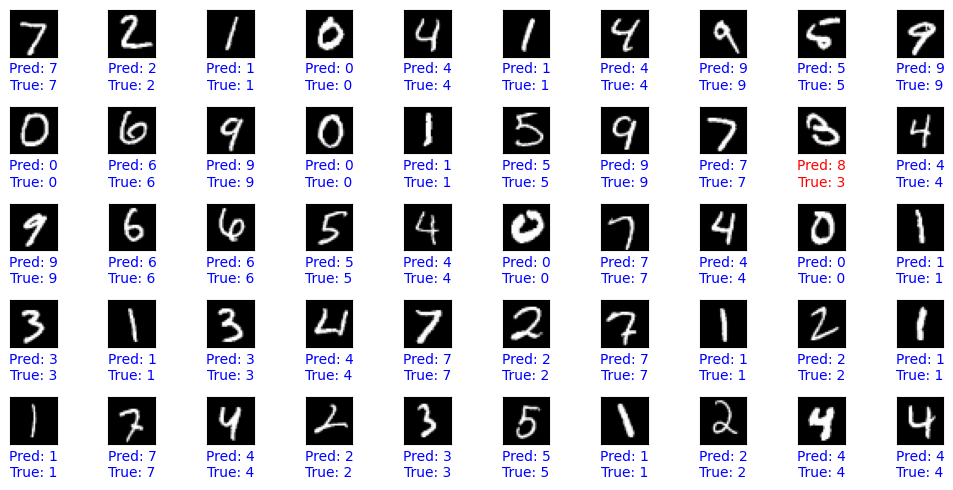

Max prediction accuracy: 0.9999999403953552
Number of correct predictions: 9906
Number of  wrong prediction : 94
Total test samples: 10000


In [ ]:
# Add a channel dimension for grayscale images
test_images_reshaped = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Get model predictions on test images
predictions = model.predict(test_images_reshaped)

# Each prediction is a vector of 10 scores → pick the class with the highest score
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 5))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.gray)
    true_label = class_names[test_labels[i]]
    predicted_label = class_names[predicted_labels[i]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
plt.tight_layout()
plt.show()
print(f"Max prediction accuracy: {np.max(predictions)}")
print(f"Number of correct predictions: {np.sum(np.argmax(predictions, axis=1) == test_labels)}")
print(f"Number of  wrong prediction : {len(test_labels) - np.sum(np.argmax(predictions, axis=1) == test_labels)}")
print(f"Total test samples: {len(test_labels)}")

Number of wrong prediction is very small ( that is means the model work very well ) work woth a high confidence

now Wrap MY model with ART’s classifier wrapper (e.g., ARTClassifier or PyTorchClassifier). we use kerasClassifier

Why we use a ART classifier ??

We use the ART classifier so that attacks and defenses can work on any ML model without having to rewrite attack code for each framework


In [8]:
from art.estimators.classification import KerasClassifier

classifier = KerasClassifier(model=model, clip_values=(0, 1))


Now ,Generate adversarial examples using ART’s FGSM implementation


In [9]:
from art.attacks.evasion import FastGradientMethod


attack = FastGradientMethod(estimator=classifier, eps=1)

x_test_adv = attack.generate(x=test_images)


In [ ]:
# evaluate accuracy and see output

test_loss, test_acc = model.evaluate(x_test_adv, test_labels, verbose=0)
print(f"Test accuracy: {test_acc*100:.2f}%")

Test accuracy: 19.08%


when we increase the eps the acuracy drop.

when we use eps=0.2 --> Accuracy drop due to adversarial attack: 0.8108

when we use eps=1 ( very high) --> 0.8247

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step


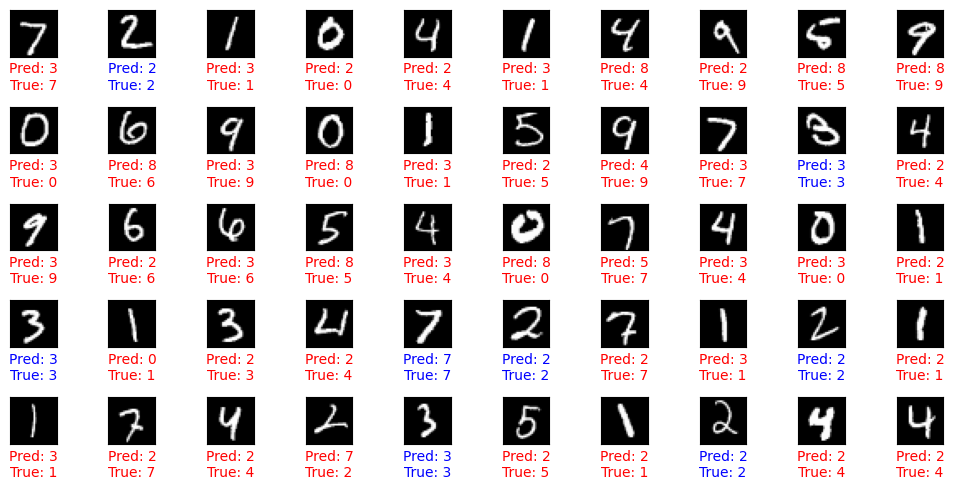

Max prediction accuracy: 0.9999999403953552
Number of correct predictions: 1908
Number of  wrong prediction : 8092
Total test samples: 10000


In [ ]:
# Add a channel dimension for grayscale images
test_images_reshaped = x_test_adv.reshape((test_images.shape[0], 28, 28, 1))

# Get model predictions on test images
predictions = model.predict(test_images_reshaped)

# Each prediction is a vector of 10 scores → pick the class with the highest score
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 5))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.gray)
    true_label = class_names[test_labels[i]]
    predicted_label = class_names[predicted_labels[i]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
plt.tight_layout()
plt.show()
print(f"Max prediction accuracy: {np.max(predictions)}")
print(f"Number of correct predictions: {np.sum(np.argmax(predictions, axis=1) == test_labels)}")
print(f"Number of  wrong prediction : {len(test_labels) - np.sum(np.argmax(predictions, axis=1) == test_labels)}")
print(f"Total test samples: {len(test_labels)}")

Accuracy on clean test examples: 0.9913
Accuracy on adversarial test examples: 0.8483
Accuracy drop due to adversarial attack: 0.1430
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
Correct predictions (clean): 9913
Correct predictions (adv): 8483
Wrong predictions (clean): 87
Wrong predictions (adv): 1517


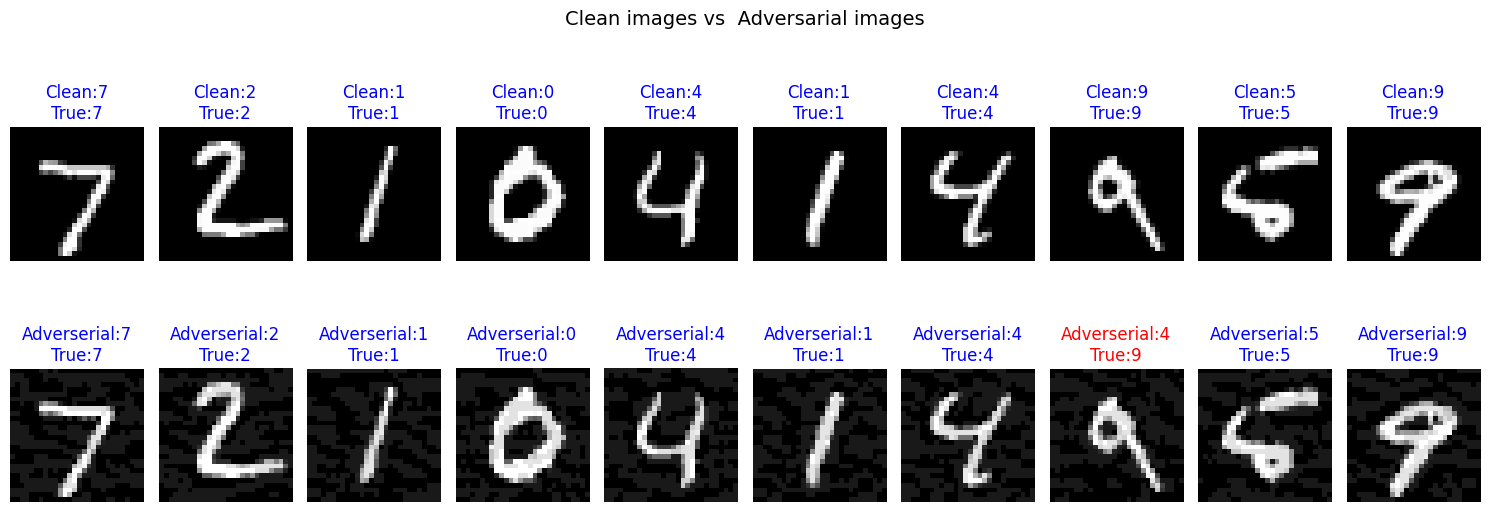

In [12]:
# --- Evaluate accuracy ---
loss_clean, accuracy_clean = model.evaluate(test_images, test_labels, verbose=0)
loss_adv, accuracy_adv = model.evaluate(x_test_adv,test_labels, verbose=0)

print(f"Accuracy on clean test examples: {accuracy_clean:.4f}")
print(f"Accuracy on adversarial test examples: {accuracy_adv:.4f}")
print(f"Accuracy drop due to adversarial attack: {accuracy_clean - accuracy_adv:.4f}")

# --- Predictions ---
pred_clean = np.argmax(model.predict(test_images), axis=1)
pred_adv = np.argmax(model.predict(x_test_adv), axis=1)

# --- Comparison table ---
correct_clean = np.sum(pred_clean == test_labels)
correct_adv = np.sum(pred_adv == test_labels)
print(f"Correct predictions (clean): {correct_clean}")
print(f"Correct predictions (adv): {correct_adv}")
print(f"Wrong predictions (clean): {len(test_labels) - correct_clean}")
print(f"Wrong predictions (adv): {len(test_labels) - correct_adv}")

# --- Visual comparison ---
plt.figure(figsize=(15, 6))
for i in range(10):
    # Clean image
    plt.subplot(2, 10, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Clean:{pred_clean[i]}\nTrue:{test_labels[i]}", color=("blue" if pred_clean[i] ==test_labels[i] else "red"))
    plt.axis("off")

    # Adversarial image
    plt.subplot(2, 10, i + 11)
    plt.imshow(x_test_adv[i].reshape(28, 28), cmap="gray")
    plt.title(f"Adverserial:{pred_adv[i]}\nTrue:{test_labels[i]}", color=("blue" if pred_adv[i] == test_labels[i] else "red"))
    plt.axis("off")

plt.suptitle("Clean images vs  Adversarial images", fontsize=14)
plt.tight_layout()
plt.show()




Epsilon: 0.01 | Adv Accuracy: 0.9893 | Drop: 0.0020
Epsilon: 0.05 | Adv Accuracy: 0.9604 | Drop: 0.0309
Epsilon: 0.10 | Adv Accuracy: 0.8483 | Drop: 0.1430
Epsilon: 0.20 | Adv Accuracy: 0.4895 | Drop: 0.5018
Epsilon: 0.30 | Adv Accuracy: 0.2702 | Drop: 0.7211


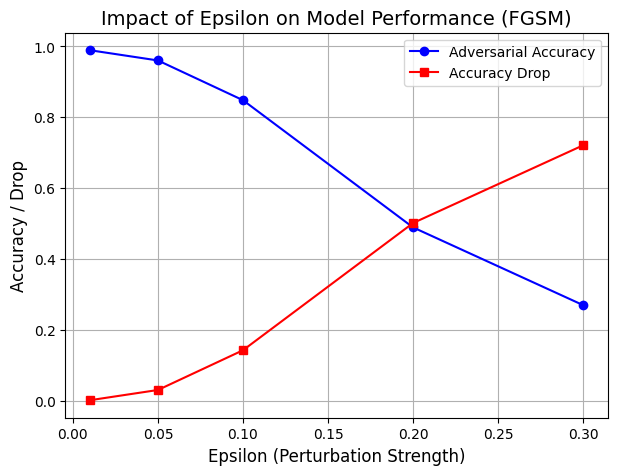

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from art.attacks.evasion import FastGradientMethod

epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3]
accuracy_clean = 0.9913  # From earlier evaluation

adv_accuracies = []
accuracy_drops = []

for eps in epsilon_values:

    attack = FastGradientMethod(estimator=classifier, eps=eps)

    x_test_adv = attack.generate(x=test_images)

    # Evaluate on adversarial examples
    loss, acc = model.evaluate(x_test_adv, test_labels, verbose=0)

    adv_accuracies.append(acc)
    accuracy_drops.append(accuracy_clean - acc)

    print(f"Epsilon: {eps:.2f} | Adv Accuracy: {acc:.4f} | Drop: {accuracy_clean - acc:.4f}")

# Plot
plt.figure(figsize=(7,5))
plt.plot(epsilon_values, adv_accuracies, marker='o', label="Adversarial Accuracy", color='blue')
plt.plot(epsilon_values, accuracy_drops, marker='s', label="Accuracy Drop", color='red')
plt.xlabel("Epsilon (Perturbation Strength)", fontsize=12)
plt.ylabel("Accuracy / Drop", fontsize=12)
plt.title("Impact of Epsilon on Model Performance (FGSM)", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()